In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from fatiando import utils
from fatiando.seismic.wavefd import Ricker, ElasticPSV, ElasticSH
from fatiando.vis import mpl
import fatiando

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
fatiando.__version__

'0.3-193-ga08a1fe'

In [3]:
shape = (400, 400)
spacing = 10
extent = [0, shape[1]*spacing, shape[0]*spacing, 0]
dens = np.ones(shape)*2200
vs = np.ones(shape)*3000
l1 = 200
dens[l1:,:] = 2400
vs[l1:,:] = 4000

In [4]:
sim1 = ElasticSH(vs, dens, spacing=spacing, taper=0.005)
sim1.add_point_source((3*shape[0]//5, shape[1]//2), Ricker(5, 20, 1/20))

In [6]:
sim1.run(500)

|##################################################|100% Ran 500 iterations in 18.3156 seconds.

In [5]:
sim1 = ElasticSH.from_cache('ElasticSH-vKyqyI.h5')

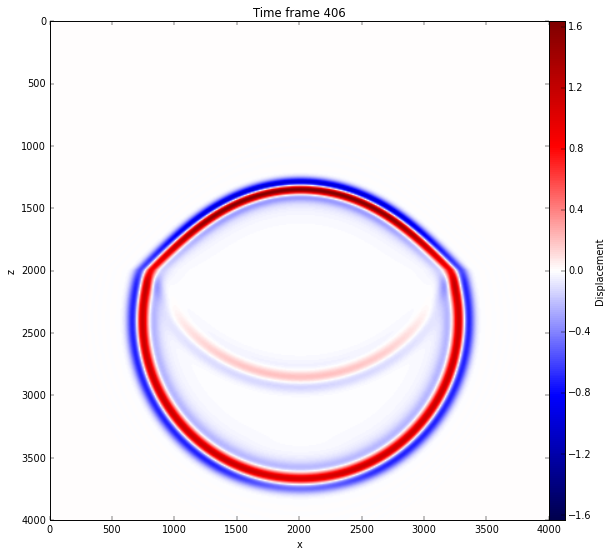

In [8]:
sim1.explore()

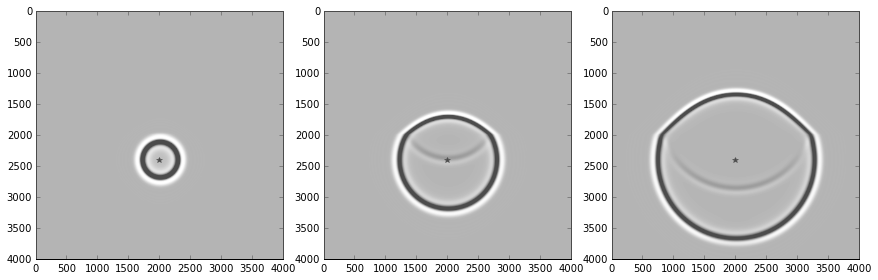

In [92]:
fig, axes = mpl.subplots(1, 3)
for f, ax in zip([138, 275, 406], axes):
    frame = sim1[f,:,:]
    ranges = 0.5*np.abs([frame.min(), frame.max()]).max()
    ax.imshow(vs, extent=extent, alpha=0.3, zorder=100000, cmap=mpl.cm.Greys)
    ax.imshow(frame, extent=extent, cmap=mpl.cm.Greys, vmin=-ranges, vmax=ranges)
    ax.plot(spacing*sim1.sources[0][0][1], spacing*sim1.sources[0][0][0], '*k')
ax.set_xlim(extent[:2])
fig.set_size_inches(12, 4)
fig.tight_layout(pad=0)
fig.savefig('../_static/img/ondas-sismicas-tarefa-raios.png')

In [7]:
sim1.animate(every=10, embed=True, dpi=50, cutoff=1.)

In [52]:
dens = np.ones(shape)*2200
vs = np.ones(shape)*3000
vp = np.ones(shape)*4000

In [79]:
sim2 = ElasticPSV(vp, vs, dens, spacing=spacing)
sim2.add_point_source((shape[0]//2, shape[1]//2), dip=45, wavelet=Ricker(5, 20, 1/20))

In [82]:
sim2.run(500)

|##################################################|100% Ran 500 iterations in 39.6041 seconds.

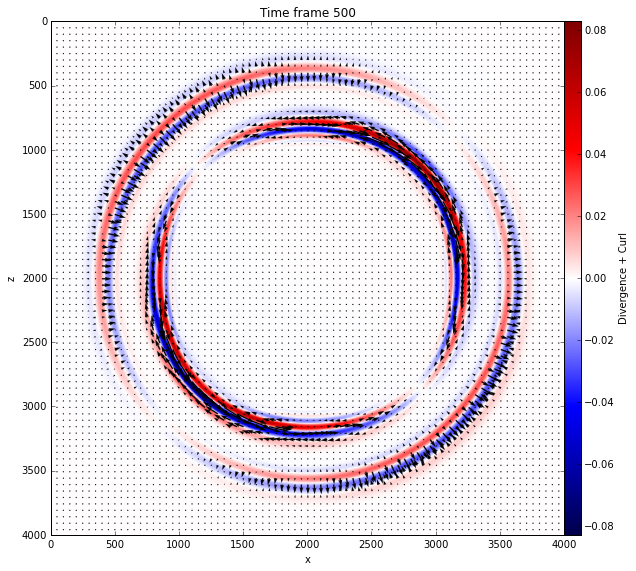

In [90]:
sim2.snapshot(500, plottype=['vectors', 'wavefield'], scale=100)

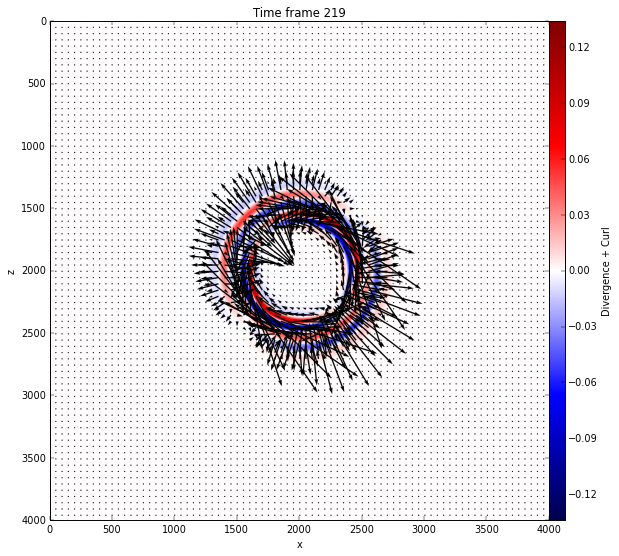

In [84]:
sim2.explore(plottype=['vectors', 'wavefield'], every_particle=5, scale=300)

In [85]:
sim2.animate(every=10, plottype=['vectors', 'wavefield'], every_particle=5, scale=200, dpi=50, embed=True)

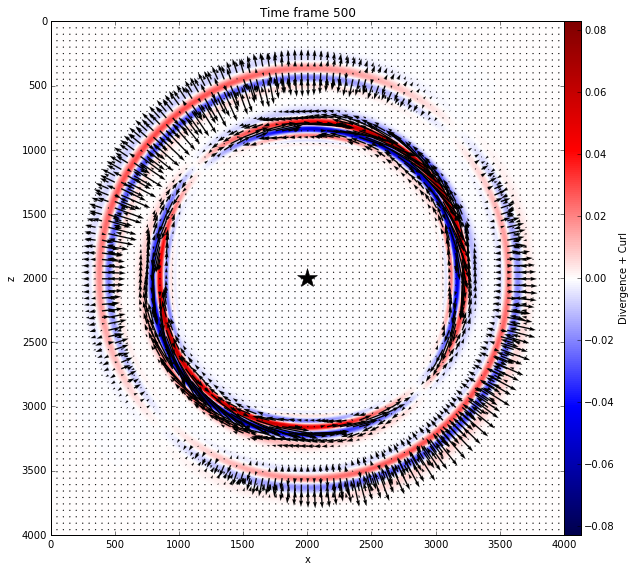

In [108]:
fig = mpl.figure()
ax = mpl.subplot(111)    
ax.plot(spacing*sim2.sources[0][0][1], spacing*sim2.sources[0][0][0], '*k', markersize=20)
sim2.snapshot(f, plottype=['vectors', 'wavefield'], every_particle=5, scale=250, ax=ax)
#fig.set_size_inches(6, 8)
#fig.tight_layout(pad=0)
fig.savefig('../_static/img/ondas-sismicas-tarefa-p-s.png')